In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [128]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [129]:
df['country'].value_counts()

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

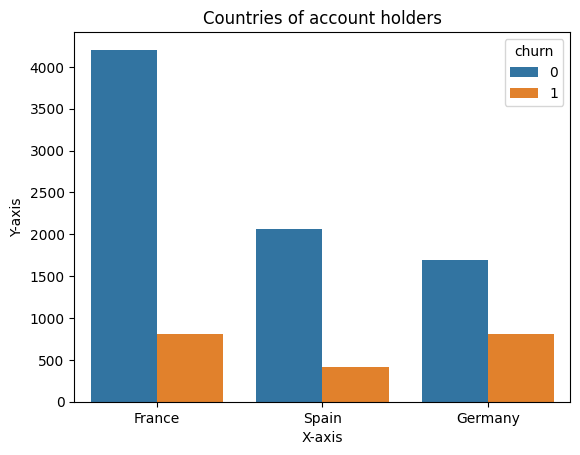

In [130]:
sns.countplot(data= df, x='country', hue='churn')
plt.title('Countries of account holders')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [131]:
size_mapping = {'France':0, 'Germany':1,'Spain':2}
df['country'] = df['country'].replace(size_mapping)
df

C:\Users\flash\AppData\Local\Temp\ipykernel_26332\524772568.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['country'] = df['country'].replace(size_mapping)


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,0,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,0,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,1,Male,42,3,75075.31,2,1,0,92888.52,1


In [132]:
df['gender'].value_counts()

gender
Male      5457
Female    4543
Name: count, dtype: int64

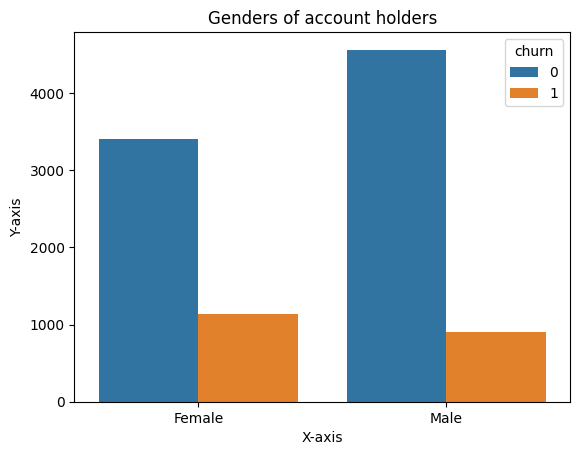

In [133]:
sns.countplot(data= df, x='gender', hue='churn')
plt.title('Genders of account holders')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [134]:
size_mapping = {'Female':0, 'Male':1}
df['gender'] = df['gender'].replace(size_mapping)
df

C:\Users\flash\AppData\Local\Temp\ipykernel_26332\3854564631.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace(size_mapping)


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [135]:
encoded_df = df.select_dtypes(include=['int64', 'float64']).copy()
encoded_df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [136]:
y = encoded_df['churn']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

In [137]:

x = encoded_df.drop('churn', axis=1)
x

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,1,39,5,0.00,2,1,0,96270.64
9996,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,15584532,709,0,0,36,7,0.00,1,0,1,42085.58
9998,15682355,772,1,1,42,3,75075.31,2,1,0,92888.52


In [138]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7000, 11), (3000, 11), (7000,), (3000,))

In [139]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled, x_test_scaled

(array([[ 1.21282685, -0.34459497,  1.50730692, ...,  0.64598061,
          0.97071435,  1.24821373],
        [-1.49858377, -0.09518109,  0.30201238, ..., -1.54803408,
          0.97071435,  1.52122527],
        [ 1.09130779, -0.94734518, -0.90328217, ..., -1.54803408,
         -1.03016917,  1.2636148 ],
        ...,
        [-1.62686706,  0.86090545, -0.90328217, ..., -1.54803408,
         -1.03016917, -0.14925893],
        [ 1.63407805,  0.15423279, -0.90328217, ...,  0.64598061,
         -1.03016917, -0.05754351],
        [ 0.21993537,  0.46600014,  0.30201238, ...,  0.64598061,
          0.97071435, -0.81942612]], shape=(7000, 11)),
 array([[-0.04193103, -0.5836166 ,  0.30201238, ..., -1.54803408,
         -1.03016917, -1.02396381],
        [ 0.64803448, -0.30302599, -0.90328217, ...,  0.64598061,
          0.97071435,  0.79009571],
        [ 0.43558184, -0.53165538,  1.50730692, ...,  0.64598061,
         -1.03016917, -0.73304841],
        ...,
        [-1.55870871, -0.44851742, -

<Axes: >

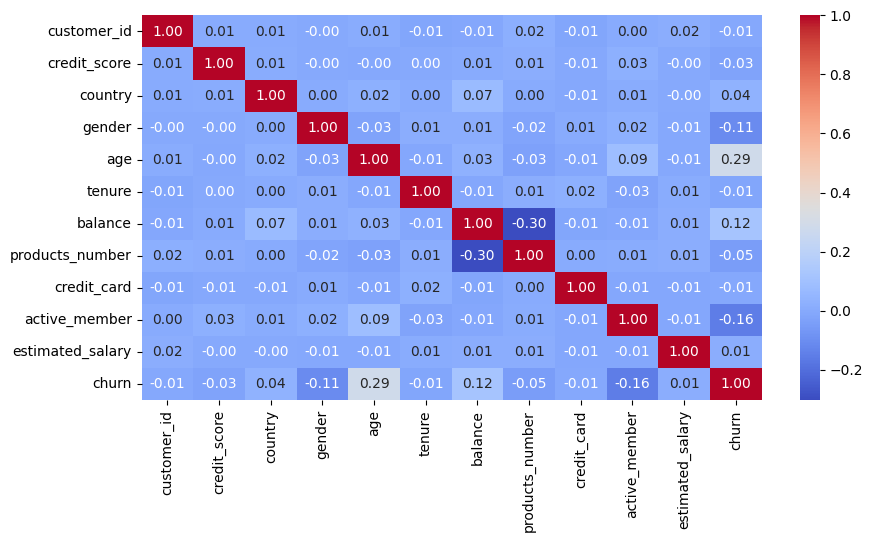

In [140]:
corr = encoded_df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

In [141]:

correlation = encoded_df.corr()['churn'].drop('churn')
correlation.sort_values(ascending=False)

age                 0.285323
balance             0.118533
country             0.035943
estimated_salary    0.012097
customer_id        -0.006248
credit_card        -0.007138
tenure             -0.014001
credit_score       -0.027094
products_number    -0.047820
gender             -0.106512
active_member      -0.156128
Name: churn, dtype: float64

In [142]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

logistic_model = LogisticRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(logistic_model, x_train_scaled, y_train, cv=kf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")

x_train_scaled = pd.DataFrame(x_train_scaled)
y_train = pd.Series(y_train)
fold = 1
for train_idx, val_idx in kf.split(x_train_scaled, y_train):
    logistic_model.fit(x_train_scaled.iloc[train_idx], y_train.iloc[train_idx])
    y_val_pred = logistic_model.predict(x_train_scaled.iloc[val_idx])
    print(f"\nFold {fold} Classification Report:")
    print(classification_report(y_train.iloc[val_idx], y_val_pred))
    fold += 1

logistic_model.fit(x_train_scaled, y_train)
y_pred = logistic_model.predict(x_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy scores for each fold: [0.81857143 0.79071429 0.81571429 0.79214286 0.80857143]
Mean Accuracy: 0.8051
Standard Deviation: 0.0117

Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1121
           1       0.63      0.22      0.32       279

    accuracy                           0.82      1400
   macro avg       0.73      0.59      0.61      1400
weighted avg       0.79      0.82      0.78      1400


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1099
           1       0.54      0.16      0.25       301

    accuracy                           0.79      1400
   macro avg       0.68      0.56      0.56      1400
weighted avg       0.75      0.79      0.74      1400


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1123
       

In [143]:

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(logistic_model, x_train_scaled, y_train, cv=skf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")

logistic_model.fit(x_train_scaled, y_train)

y_pred = logistic_model.predict(x_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy scores for each fold: [0.80857143 0.79857143 0.805      0.80142857 0.81      ]
Mean Accuracy: 0.8047
Standard Deviation: 0.0043
Test Accuracy: 0.817
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      2416
           1       0.60      0.17      0.27       584

    accuracy                           0.82      3000
   macro avg       0.72      0.57      0.58      3000
weighted avg       0.79      0.82      0.77      3000



In [144]:
from sklearn.neighbors import KNeighborsClassifier


knn_model = KNeighborsClassifier(n_neighbors=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(knn_model, x_train_scaled, y_train, cv=kf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")

knn_model.fit(x_train_scaled, y_train)

y_pred = knn_model.predict(x_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy scores for each fold: [0.82571429 0.81071429 0.82285714 0.81428571 0.83571429]
Mean Accuracy: 0.8219
Standard Deviation: 0.0088
Test Accuracy: 0.8383333333333334
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      2416
           1       0.65      0.37      0.47       584

    accuracy                           0.84      3000
   macro avg       0.75      0.66      0.69      3000
weighted avg       0.82      0.84      0.82      3000



In [145]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(knn_model, x_train_scaled, y_train, cv=skf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")

knn_model.fit(x_train_scaled, y_train)

y_pred = knn_model.predict(x_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy scores for each fold: [0.82357143 0.82785714 0.82285714 0.805      0.82357143]
Mean Accuracy: 0.8206
Standard Deviation: 0.0080
Test Accuracy: 0.8383333333333334
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      2416
           1       0.65      0.37      0.47       584

    accuracy                           0.84      3000
   macro avg       0.75      0.66      0.69      3000
weighted avg       0.82      0.84      0.82      3000



In [146]:
from sklearn.svm import SVC

svc_model = SVC(kernel='rbf', random_state=42)
skf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svc_model, x_train_scaled, y_train, cv=skf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")

svc_model.fit(x_train_scaled, y_train)

y_pred = svc_model.predict(x_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy scores for each fold: [0.855      0.84428571 0.84785714 0.84285714 0.85714286]
Mean Accuracy: 0.8494
Standard Deviation: 0.0057
Test Accuracy: 0.8626666666666667
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2416
           1       0.84      0.37      0.51       584

    accuracy                           0.86      3000
   macro avg       0.85      0.67      0.71      3000
weighted avg       0.86      0.86      0.84      3000



In [147]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svc_model, x_train_scaled, y_train, cv=skf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")

svc_model.fit(x_train_scaled, y_train)

y_pred = svc_model.predict(x_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy scores for each fold: [0.84785714 0.86214286 0.85071429 0.84428571 0.84785714]
Mean Accuracy: 0.8506
Standard Deviation: 0.0061
Test Accuracy: 0.8626666666666667
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2416
           1       0.84      0.37      0.51       584

    accuracy                           0.86      3000
   macro avg       0.85      0.67      0.71      3000
weighted avg       0.86      0.86      0.84      3000



In [148]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)
print("Before SMOTE:",y_train.value_counts())
print("After SMOTE:",y_resampled.value_counts())

Before SMOTE: churn
0    5972
1    1528
Name: count, dtype: int64
After SMOTE: churn
1    5972
0    5972
Name: count, dtype: int64


In [149]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_resampled)
x_test_scaled = scaler.transform(x_test)

x_train_scaled, x_test_scaled

(array([[-1.24488103,  0.95562976, -0.89670483, ..., -1.28593644,
          1.29237908,  1.20933271],
        [-1.32092859, -1.42636166, -0.89670483, ..., -1.28593644,
          1.29237908,  1.06729481],
        [-0.41193169, -0.83360803,  0.42849221, ...,  0.77764341,
          1.29237908,  1.65053838],
        ...,
        [ 1.58734341,  2.18504469,  1.75368926, ..., -1.28593644,
         -0.77376678, -1.25755474],
        [-0.46668871, -0.24085441, -0.89670483, ..., -1.28593644,
         -0.77376678, -0.17198356],
        [ 1.22210735,  1.19712198,  0.42849221, ...,  0.77764341,
         -0.77376678, -0.56459894]], shape=(11944, 11)),
 array([[-0.96775763, -0.14206214,  1.75368926, ...,  0.77764341,
         -0.77376678, -1.48703952],
        [-0.49922709,  1.19712198,  1.75368926, ..., -1.28593644,
          1.29237908,  1.69531243],
        [-0.71806121,  0.14333776,  0.42849221, ..., -1.28593644,
          1.29237908,  0.21949918],
        ...,
        [ 0.89089183, -1.00923874, 

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(x_train_scaled, y_resampled)
y_pred= model.predict(x_test_scaled)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82      1707
           1       0.62      0.40      0.49       793

    accuracy                           0.73      2500
   macro avg       0.69      0.64      0.65      2500
weighted avg       0.72      0.73      0.71      2500



In [151]:
logistic_model = LogisticRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(logistic_model, x_train_scaled, y_resampled, cv=kf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")

x_train_scaled = pd.DataFrame(x_train_scaled)
y_train = pd.Series(y_train)
fold = 1
for train_idx, val_idx in kf.split(x_train_scaled, y_resampled):
    logistic_model.fit(x_train_scaled.iloc[train_idx], y_resampled.iloc[train_idx])
    y_val_pred = logistic_model.predict(x_train_scaled.iloc[val_idx])
    print(f"\nFold {fold} Classification Report:")
    print(classification_report(y_resampled.iloc[val_idx], y_val_pred))
    fold += 1

Accuracy scores for each fold: [0.7626622  0.77270825 0.7655923  0.76140645 0.75879397]
Mean Accuracy: 0.7642
Standard Deviation: 0.0048

Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76      1206
           1       0.76      0.76      0.76      1183

    accuracy                           0.76      2389
   macro avg       0.76      0.76      0.76      2389
weighted avg       0.76      0.76      0.76      2389


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1194
           1       0.77      0.78      0.78      1195

    accuracy                           0.77      2389
   macro avg       0.77      0.77      0.77      2389
weighted avg       0.77      0.77      0.77      2389


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1230
       

In [152]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(rf_model, x_train_scaled, y_resampled, cv=kf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")

x_train_scaled = pd.DataFrame(x_train_scaled)
y_train = pd.Series(y_train)
fold = 1
for train_idx, val_idx in kf.split(x_train_scaled, y_resampled):
    rf_model.fit(x_train_scaled.iloc[train_idx], y_resampled.iloc[train_idx])
    y_val_pred = rf_model.predict(x_train_scaled.iloc[val_idx])
    print(f"\nFold {fold} Classification Report:")
    print(classification_report(y_resampled.iloc[val_idx], y_val_pred))
    fold += 1

Accuracy scores for each fold: [0.85851821 0.85935538 0.8673085  0.85265802 0.86474037]
Mean Accuracy: 0.8605
Standard Deviation: 0.0051

Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1206
           1       0.85      0.86      0.86      1183

    accuracy                           0.86      2389
   macro avg       0.86      0.86      0.86      2389
weighted avg       0.86      0.86      0.86      2389


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1194
           1       0.86      0.86      0.86      1195

    accuracy                           0.86      2389
   macro avg       0.86      0.86      0.86      2389
weighted avg       0.86      0.86      0.86      2389


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1230
       

In [154]:
from sklearn.svm import SVC

svc_model = SVC(kernel='rbf', random_state=42)
skf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svc_model, x_train_scaled, y_resampled, cv=skf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")

svc_model.fit(x_train_scaled, y_resampled)

y_resampled = svc_model.predict(x_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_resampled))
print(classification_report(y_test, y_resampled))

Accuracy scores for each fold: [0.82000837 0.84303056 0.82251988 0.83633319 0.83082077]
Mean Accuracy: 0.8305
Standard Deviation: 0.0085
Test Accuracy: 0.8016
              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1991
           1       0.51      0.67      0.58       509

    accuracy                           0.80      2500
   macro avg       0.71      0.75      0.72      2500
weighted avg       0.83      0.80      0.81      2500

